# Customer Churn Statistical Analysis

### <b>Goal</b>: The purpose of this analysis is to use statistical methods and data visualizations to identify variables that help stakeholders understand which customers are no longer purchasing products or services.

### <b>Analysis</b>: After loading the data with pandas, I conducted basic exploratory analysis on the target variable as well as the target variable compared to the independent variables. Scatterplots, ECDF plots, and boxplots were used to understand relationships and patterns present in the data. Patterns in these visualizations are visible, so hypothesis testing was performed to tests these assumptions. Student T-tests and Chi-Squared tests were performed along with visualizations of significant variables. The test results led to a subset of significant variables that were used to create a decision tree. 

### <b>Conclusion</b>: After a series of hypothesis tests, it was discovered that the customer's age has a significant association with customer churn. As depicted by the scatterplot below, a large portion of customers that have churned are between the ages of 45 and 65. Other variables with less yet significant associations with customer churn included active member status, account balance, number of products purchased, and credit score (**listed from greatest to least significance). Using these variables, a decision tree model was created to further understand customer churn. The model determined that inactive members over the age of 44 had a high amount of churn, 79%. Furthermore, it can be noted that members over the age of 39 have a churn rate of 69%. I suggest looking deeper into this demographic of customers with data analyses, surveys, and purchase histories to determine why this group of customers leave at such a high rate.



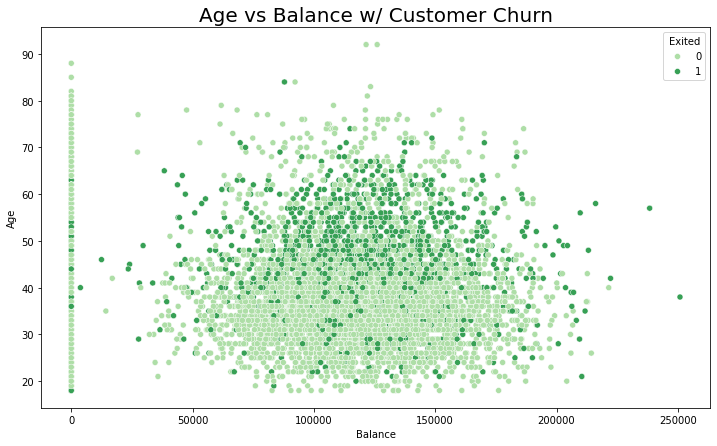
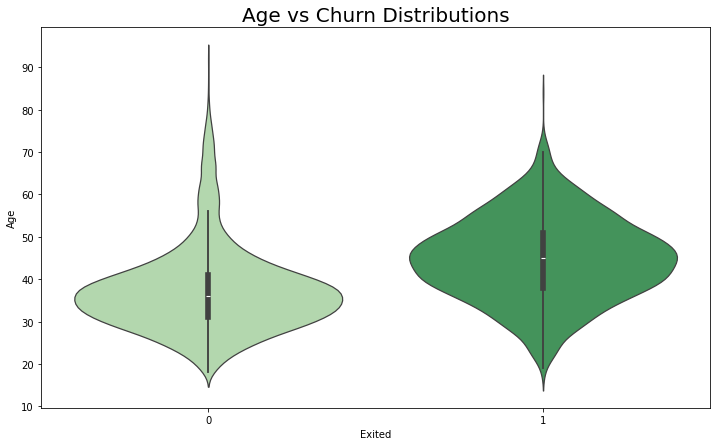
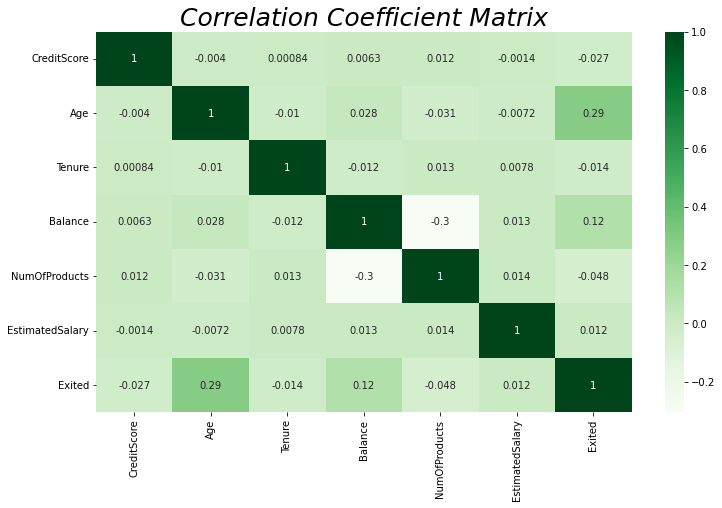
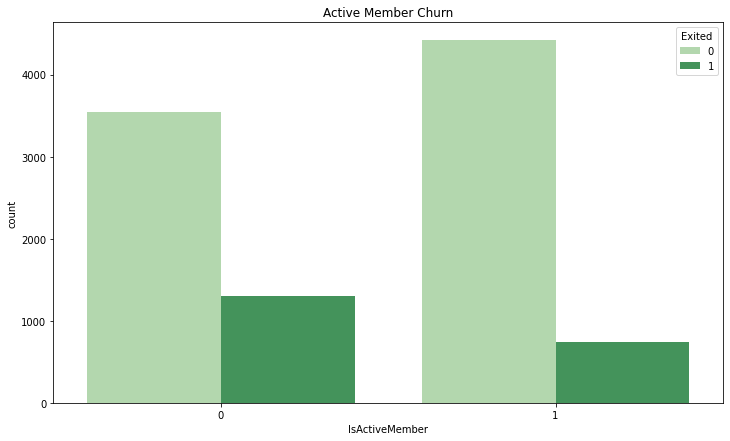
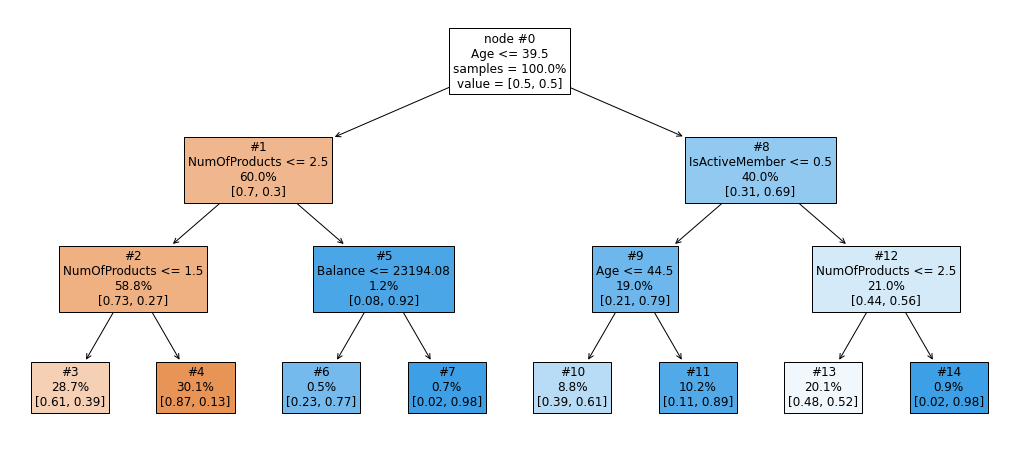

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)

### Dataframe Preview

In [176]:
churn = pd.read_csv("Churn_Modeling.csv")
churn.drop("RowNumber", axis=1, inplace=True)
churn["CustomerId"] = churn["CustomerId"].astype("object")
churn.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Dataframe Inspection

In [177]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  object 
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


## Target Variable Inspection: "Exited" 

,Exited,count
0,0,7963
1,1,2037


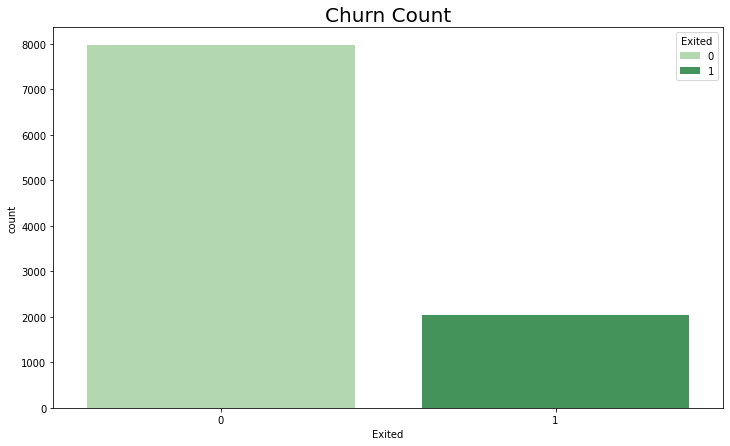

In [ ]:
display(churn["Exited"].value_counts().reset_index())

sns.countplot(churn, x="Exited", hue="Exited", palette="Greens")
plt.title("Churn Count", fontsize=20)
plt.show()

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


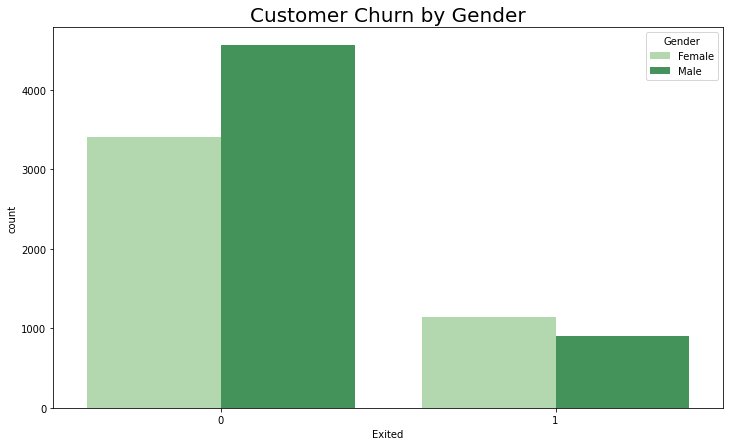

In [287]:
display(pd.pivot_table(churn, index="Gender", columns="Exited", values="CustomerId", aggfunc="count"))

sns.countplot(churn, x="Exited", hue="Gender", palette="Greens")
plt.title("Customer Churn by Gender", fontsize=20)
plt.show()

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


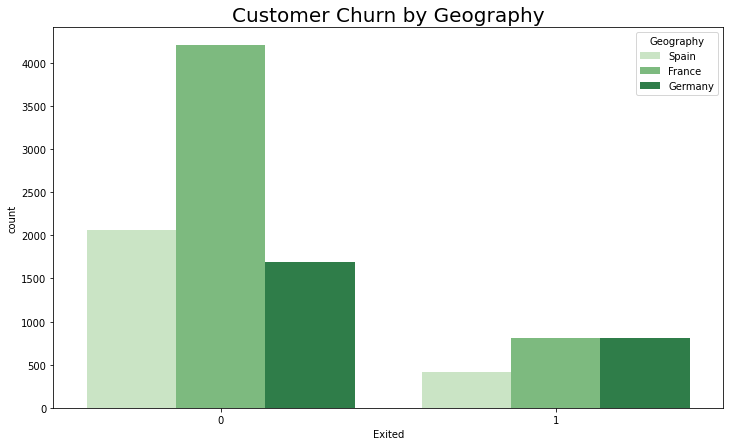

In [288]:
display(pd.pivot_table(churn, index="Geography", columns="Exited", values="CustomerId", aggfunc="count"))

sns.countplot(churn, x="Exited", hue="Geography", palette="Greens")
plt.title("Customer Churn by Geography", fontsize=20)
plt.show()

,min,mean,max
Exited,,,
0,18,37.408389,92
1,18,44.837997,84


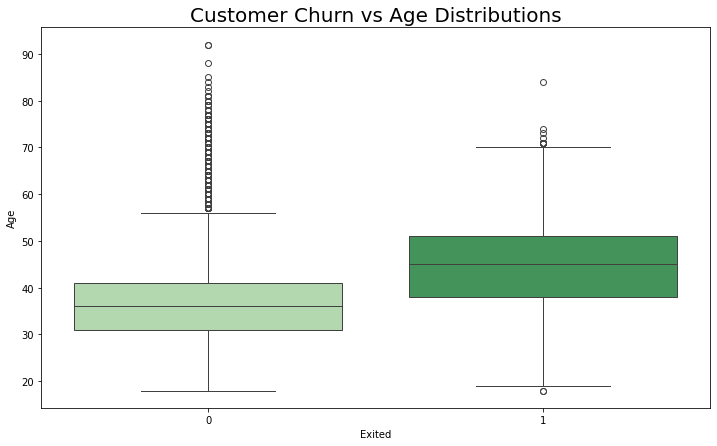

In [290]:
display(churn.groupby("Exited")["Age"].agg(["min","mean","max"]))

sns.boxplot(churn, x="Exited", y="Age", palette="Greens")
plt.title("Customer Churn vs Age Distributions", fontsize=20)
plt.show()

,min,mean,max
Exited,,,
0,405,651.853196,850
1,350,645.351497,850


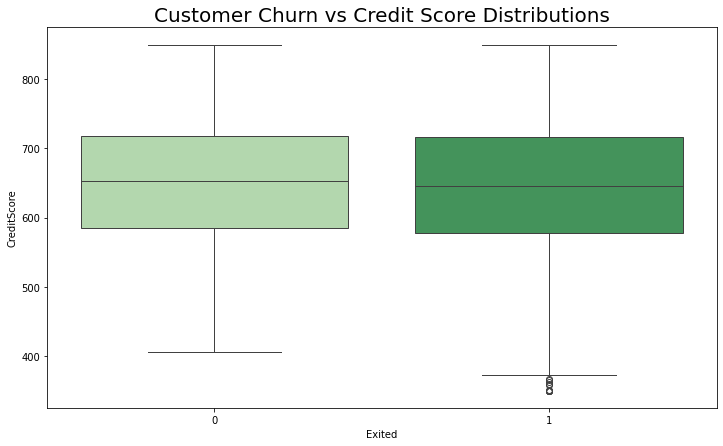

In [291]:
display(churn.groupby("Exited")["CreditScore"].agg(["min","mean","max"]))

sns.boxplot(churn, x="Exited", y="CreditScore", palette="Greens")
plt.title("Customer Churn vs Credit Score Distributions", fontsize=20)
plt.show()

,min,mean,max
Exited,,,
0,0,5.033279,10
1,0,4.932744,10


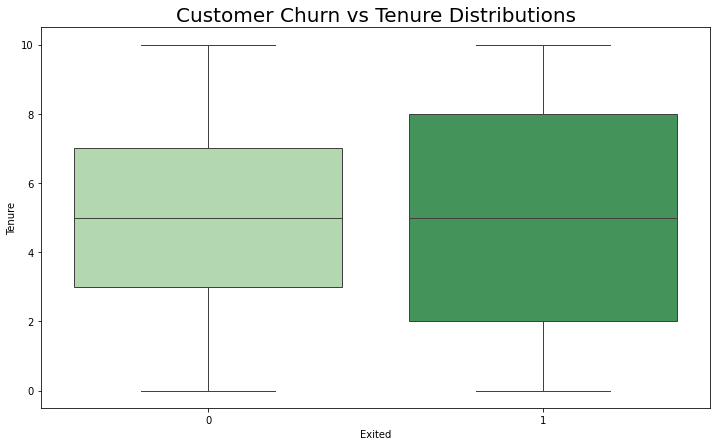

In [292]:
display(churn.groupby("Exited")["Tenure"].agg(["min","mean","max"]))

sns.boxplot(churn, x="Exited", y="Tenure", palette="Greens")
plt.title("Customer Churn vs Tenure Distributions", fontsize=20)
plt.show()

## Numerical Analysis w/ Correlation Coefficient Matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


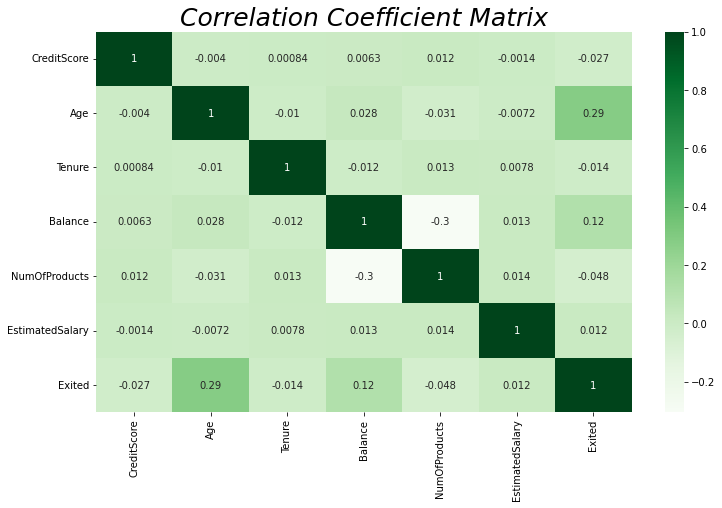

In [303]:
display(churn.drop(["Exited","HasCrCard","IsActiveMember"], axis=1).select_dtypes(include=["int", "float64"]).corr())


sns.heatmap(churn.drop(["HasCrCard","IsActiveMember"], axis=1).select_dtypes(include=["int", "float64"]).corr(), annot=True, cmap="Greens")
plt.title("Correlation Coefficient Matrix", fontsize=25, fontstyle="oblique")
plt.show()

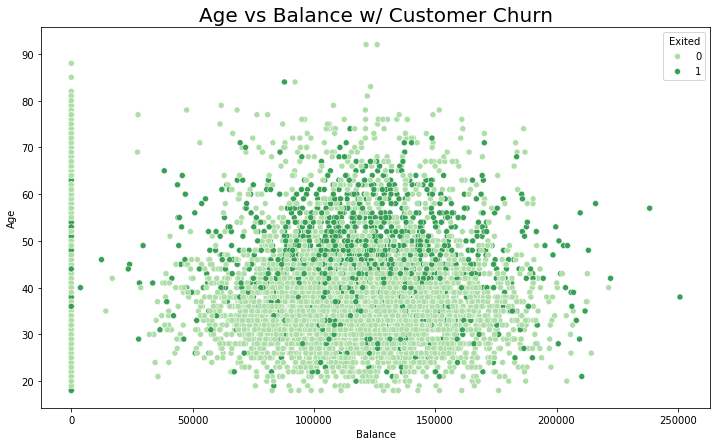

In [302]:
sns.scatterplot(data=churn, x="Balance", y="Age", color="lightgreen", hue="Exited", palette="Greens")
plt.title("Age vs Balance w/ Customer Churn", fontsize=20)
plt.show()
plt.savefig('corr_matrix.png')

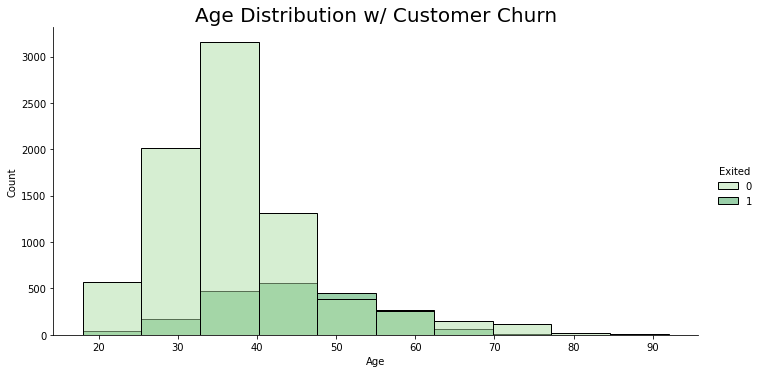

In [321]:
sns.displot(data=churn, x="Age", bins=10, hue="Exited", palette="Greens", aspect=2)
plt.title("Age Distribution w/ Customer Churn", fontsize=20)
plt.show()

,min,mean,max
Exited,,,
0,405,651.853196,850
1,350,645.351497,850


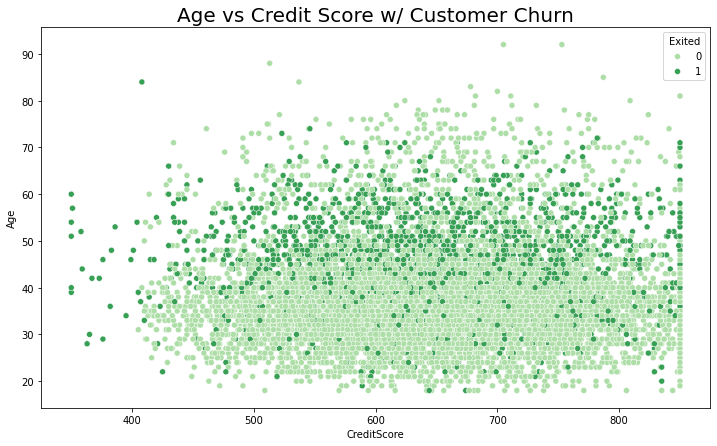

In [307]:
display(churn.groupby("Exited")["CreditScore"].agg(["min","mean","max"]))

sns.scatterplot(data=churn, x="CreditScore", y="Age", color="lightgreen", hue="Exited", palette="Greens")
plt.title("Age vs Credit Score w/ Customer Churn", fontsize=20)
plt.show()

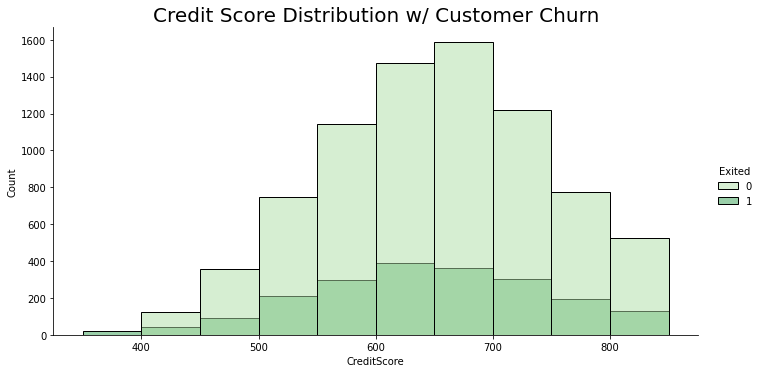

In [309]:
sns.displot(data=churn, x="CreditScore", bins=10, hue="Exited", palette="Greens", aspect=2)
plt.title("Credit Score Distribution w/ Customer Churn", fontsize=20)
plt.show()

## Chi Square Hypothesis Testing
#### Active Members vs Customer Churn

In [266]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(churn["IsActiveMember"], churn["Exited"])
display(contingency_table)    

# Perform the chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")
print(f'{"Fail to Reject Null Hypothesis. There is not enough evidence to support the claim that the customers active status is related to customer churn." if p_value > 0.05 else "Reject Null Hypothesis. There is enough evidence to support the claim that the customers active status is related to customer churn."}')


Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


Chi-squared statistic: 242.98534164287963
P-value: 8.785858269303705e-55
Reject Null Hypothesis. There is enough evidence to support the claim that the customers active status is related to customer churn.


#### Active Member vs Churn Distribution Visualizations

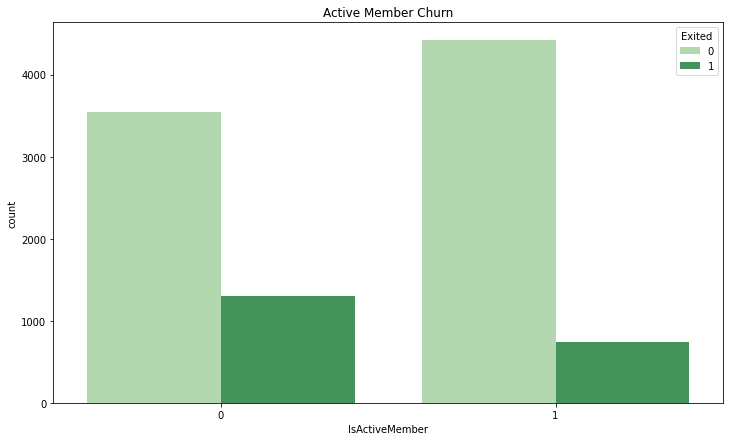

In [338]:
sns.countplot(data=churn, x="IsActiveMember", hue="Exited", palette="Greens")
plt.title("Active Member Churn")
plt.show()

#### Credit Card Holders vs Customer Churn

In [265]:
contingency_table = pd.crosstab(churn["HasCrCard"], churn["Exited"])
display(contingency_table)    

# Perform the chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p_value}")
print(f'{"Fail to Reject Null Hypothesis. There is not enough evidence to support the claim that the credit card status(has/does not have) is related to customer churn." if p_value > 0.05 else "Reject Null Hypothesis. There is enough evidence to support the claim that the credit card status(has/does not have) is related to customer churn."}')


Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


Chi-squared statistic: 0.47133779904440803
P-value: 0.49237236141554697
Fail to Reject Null Hypothesis. There is not enough evidence to support the claim that the credit card status(has/does not have) is related to customer churn.


## T-test Hypothesis Testing
### Age vs Churn

In [284]:
from scipy.stats import ttest_ind

retained = churn.loc[churn["Exited"] == 0, "Age"]
exited = churn.loc[churn["Exited"] == 1, "Age"]

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(retained, exited)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(f'{"Fail to Reject Null Hypothesis. There is not enough evidence to support the claim that the customers age is related to customer churn." if p_value > 0.05 else "Reject Null Hypothesis. There is enough evidence to support the claim that the customers age is related to customer churn."}')


T-statistic: -29.76681499437077
P-value: 1.2399313093427738e-186
Reject Null Hypothesis. There is enough evidence to support the claim that the customers age is related to customer churn.


### Age vs Churn Distribution Visualizations

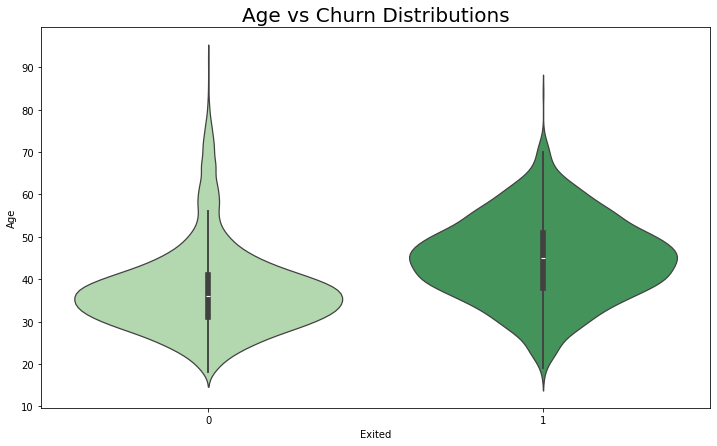

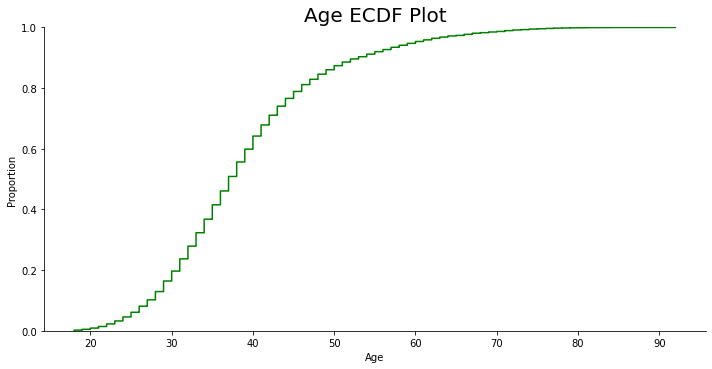

In [312]:
sns.violinplot(data=churn, x="Exited", y="Age", palette="Greens")
plt.title("Age vs Churn Distributions", fontsize=20)
plt.show()

sns.displot(churn, x="Age", kind="ecdf", color="green", aspect=2)
plt.title("Age ECDF Plot", fontsize=20)
plt.show()

### Tenure vs Churn

In [262]:
retained = churn["Tenure"][churn["Exited"] == 0]
exited = churn["Tenure"][churn["Exited"] == 1]

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(retained, exited)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(f'{"Fail to Reject Null Hypothesis. There is not enough evidence to support the claim that the customers tenure is related to customer churn." if p_value > 0.05 else "Reject Null Hypothesis. There is enough evidence to support the claim that the customers tenure is related to customer churn."}')

T-statistic: 1.4000584366735584
P-value: 0.16152684949473256
Fail to Reject Null Hypothesis. There is not enough evidence to support the claim that the customers tenure is related to customer churn.


### Credit Score vs Churn

In [261]:
retained = churn["CreditScore"][churn["Exited"] == 0]
exited = churn["CreditScore"][churn["Exited"] == 1]

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(retained, exited)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(f'{"Fail to Reject Null Hypothesis. There is not enough evidence to support the claim that the customers credit score is related to customer churn." if p_value > 0.05 else "Reject Null Hypothesis. There is enough evidence to support the claim that the customers credit score is related to customer churn."}')

T-statistic: 2.7100778888729833
P-value: 0.006738213892192373
Reject Null Hypothesis. There is enough evidence to support the claim that the customers credit score is related to customer churn.


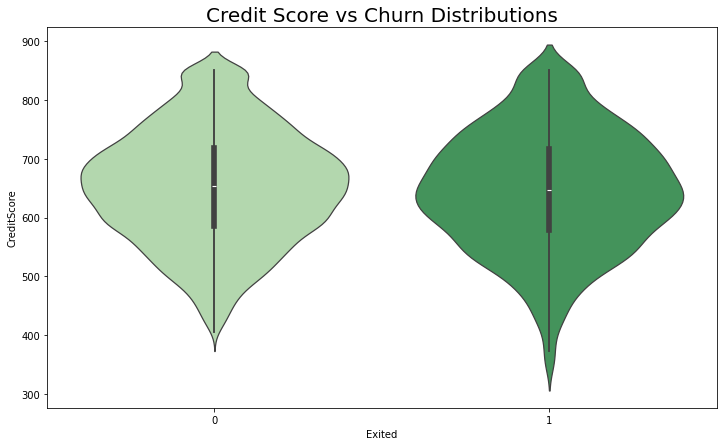

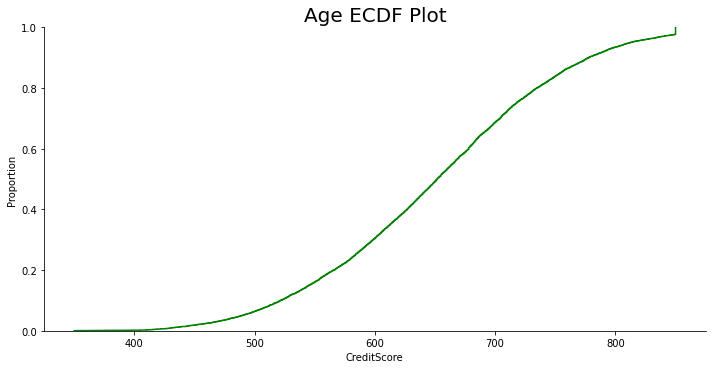

In [311]:
sns.violinplot(data=churn, x="Exited", y="CreditScore", palette="Greens")
plt.title("Credit Score vs Churn Distributions", fontsize=20)
plt.show()

sns.displot(churn, x="CreditScore", kind="ecdf", color="green", aspect=2)
plt.title("Age ECDF Plot", fontsize=20)
plt.show()

#### # of Products Puchased vs Churn

In [195]:
retained = churn["NumOfProducts"][churn["Exited"] == 0]
exited = churn["NumOfProducts"][churn["Exited"] == 1]

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(retained, exited)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 4.786984698423093
P-value: 1.717333004804293e-06


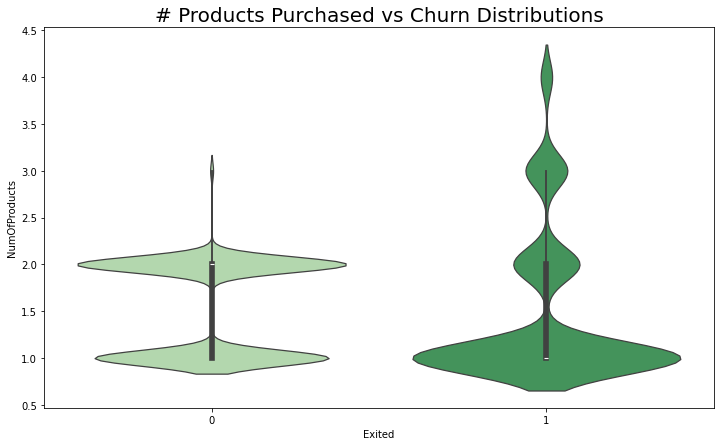

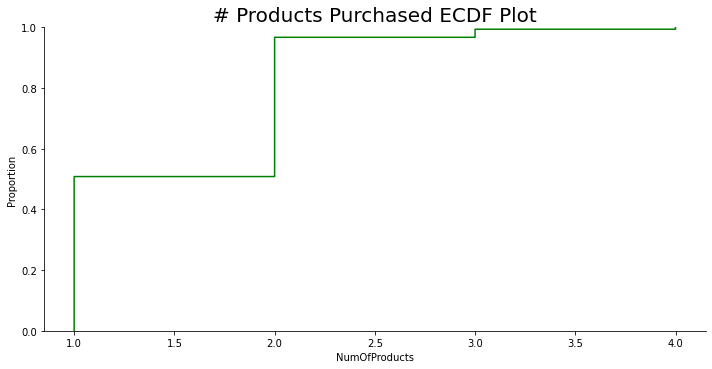

In [313]:
sns.violinplot(data=churn, x="Exited", y="NumOfProducts", palette="Greens")
plt.title("# Products Purchased vs Churn Distributions", fontsize=20)
plt.show()

sns.displot(churn, x="NumOfProducts", kind="ecdf", color="green", aspect=2)
plt.title("# Products Purchased ECDF Plot", fontsize=20)
plt.show()

#### Balance vs Churn

In [314]:
retained = churn["Balance"][churn["Exited"] == 0]
exited = churn["Balance"][churn["Exited"] == 1]

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(retained, exited)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
print(f'{"Fail to Reject Null Hypothesis. There is not enough evidence to support the claim that the customers balance is related to customer churn." if p_value > 0.05 else "Reject Null Hypothesis. There is enough evidence to support the claim that the customers balance is related to customer churn."}')

T-statistic: -11.936240300013841
P-value: 1.2755633191525477e-32
Reject Null Hypothesis. There is enough evidence to support the claim that the customers balance is related to customer churn.


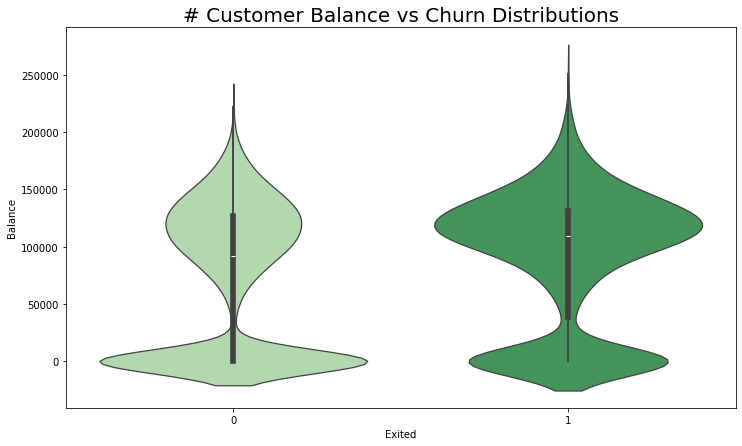

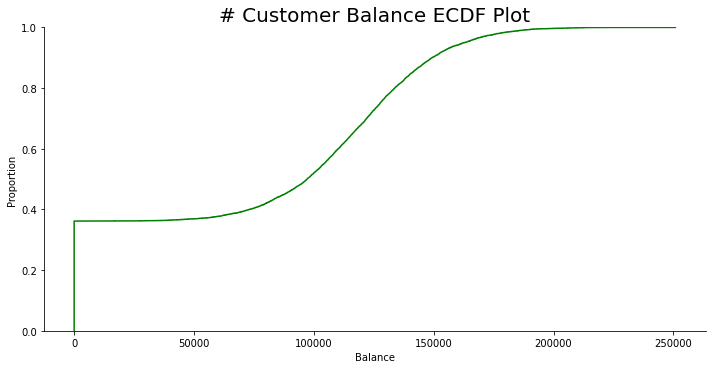

In [315]:
sns.violinplot(data=churn, x="Exited", y="Balance", palette="Greens")
plt.title("# Customer Balance vs Churn Distributions", fontsize=20)
plt.show()

sns.displot(churn, x="Balance", kind="ecdf", color="green", aspect=2)
plt.title("# Customer Balance ECDF Plot", fontsize=20)
plt.show()

## Decison Tree Modeling
#### Drop Useless Columns & One Hot Encode Categorical Variables

In [316]:
model_data = churn.drop(["CustomerId", "Surname"], axis=1)

model_data = pd.get_dummies(model_data, dtype="int64")
model_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [317]:
from sklearn.model_selection import train_test_split
from sklearn import tree

feature_cols = model_data.drop("Exited", axis=1).columns

X = model_data[feature_cols]
y = model_data["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [318]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42, class_weight="balanced")

clf2 = clf.fit(X_train, y_train)

[]

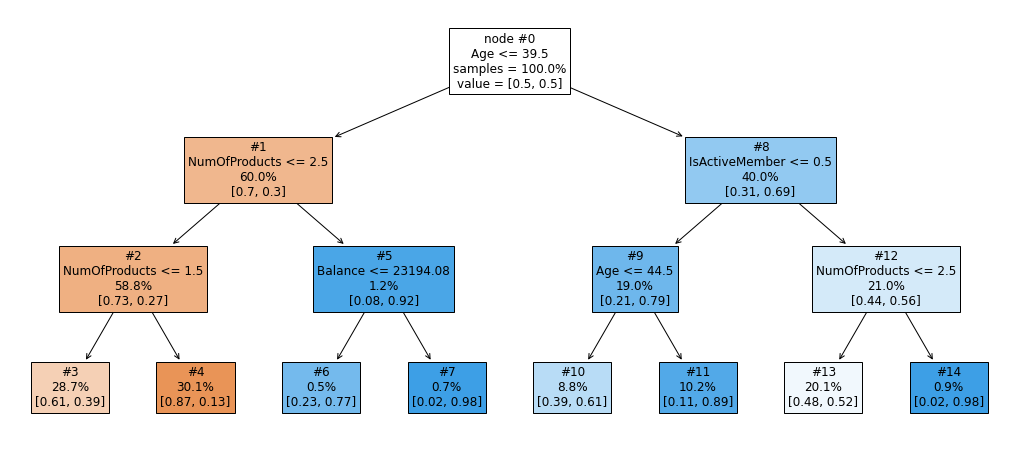

In [319]:
plt.figure(figsize=(18,8))

tree.plot_tree(clf2,
               feature_names=feature_cols,
               filled=True,
               precision=2,
               node_ids=True,
               fontsize=12,
               label="root", 
               proportion=True,
               impurity=False,)

plt.plot() 

### <b>Conclusion</b>: After a series of hypothesis tests, it was discovered that the customer's age has a significant association with customer churn. As depicted by the scatterplot below, a large portion of customers that have churned are between the ages of 45 and 65. Other variables with less yet significant associations with customer churn included active member status, account balance, number of products purchased, and credit score (**listed from greatest to least significance). Using these variables, a decision tree model was created to further understand customer churn. The model determined that inactive members over the age of 44 had a high amount of churn, 79%. Furthermore, it can be noted that members over the age of 39 have a churn rate of 69%. I suggest looking deeper into this demographic of customers with data analyses, surveys, and purchase histories to determine why this group of customers leave at such a high rate.